# A RooFit Tutorial

This tutorial will teach you the basics of using `RooFit`.

To start with we have to generate some data for use during the tutorial:

In [5]:
%%bash
root.exe -b -l -q roofit_tutorial_generate_data.C


Processing roofit_tutorial_generate_data.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

--- RooAddGenContext ---
Using PDF RooAddPdf::model[ Nsig * signal + Nbkg * bkg ]
List of component generators
    --- RooProdGenContext ---
    Using PDF     RooProdPdf::signal[ signal_mass * signal_time ]
    List of component generators
         --- RooGenContext --- 
        Using PDF         RooGaussian::signal_mass[ x=mass mean=signal_mass_mean sigma=signal_mass_sigma ]
        Use PDF generator for (mass)
        Use MC sampling generator <none> for ()
         --- RooGenContext --- 
        Using PDF         RooExponential::signal_time[ x=time c=signal_exponent ]
        Use PDF generator for ()
        Use MC sampling generator RooFoamGenerator for (time)
    --- RooProdGenContext ---

Besides printing a lot of text it also created a dataset for us in:

In [6]:
!ls *.root

dataset.root


The first few bits of code in this tutorial will load the dataset from the
ntuple and plot them in the manner of `RooFit`. This is to get you started.

The `first_plots.C` script will load the data and make some basic plots to check everything is fine. We will display the images directly in the notebook here.

In [7]:
%%bash
root.exe -b -l -q first_plots.C


Processing first_plots.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Info in <TCanvas::Print>: png file dataplot.png has been created


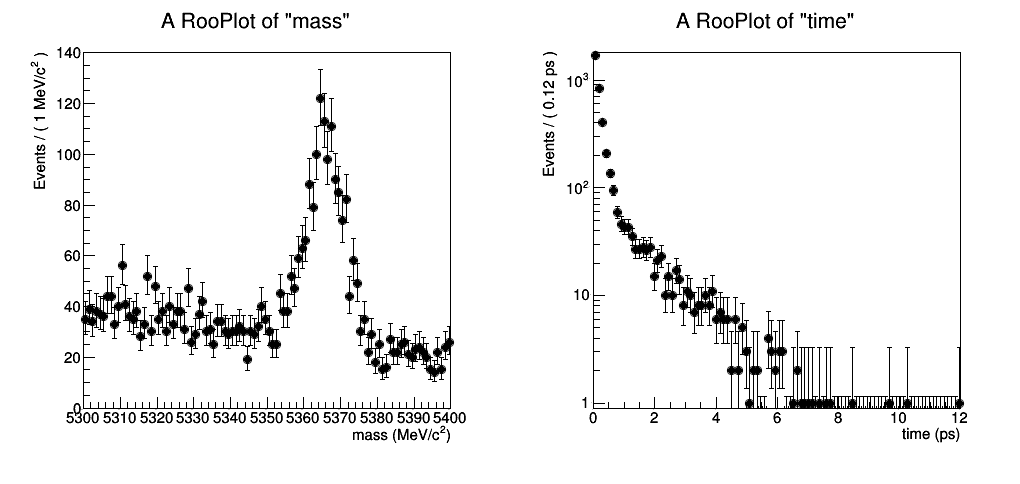

In [8]:
from IPython.display import Image
Image(filename='dataplot.png') 

With these preliminary plots and sanity checks out of the way. Let's get going.

The tutorial is written in such a way that you can run cells one at a time and modify them as you go along. This way the code can be re-run at each step to see what happens. Each of the steps is coded up in its own `root` macro. You can edit them by going to the overview page of the webinterface. There simply click on the file you want to edit, make your changes and re-run the step here.


# Your Mission

Your task is to try and fit to this dataset to extract the signal yield and lifetime.
We'll start with the signal yield, fitting to the mass distribution.
Then we'll try to extract the signal lifetime from the time distribution
Finally, we'll simultaneously fit to both time and mass to see if it
improves the errors.

In [9]:
!root -l -b -q mass_fits.C

root [0] 
Processing mass_fits.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinuit::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal_mass,bkg_mass)
 **********
 **   13 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
[#0] WARNING:Minization -- RooFitGlue: Minimized function has error status.
Returning maximum FCN so far (-10151.8) to force MIGRAD to back out of this region. Error log follows
Parameter values: Nbkg=2000, Nsig=2000, bkg_mass_p1=-1.03175, signal_mass_mean=5364.92, signal_mass_sigma=10
RooPolynomial::bkg_mas

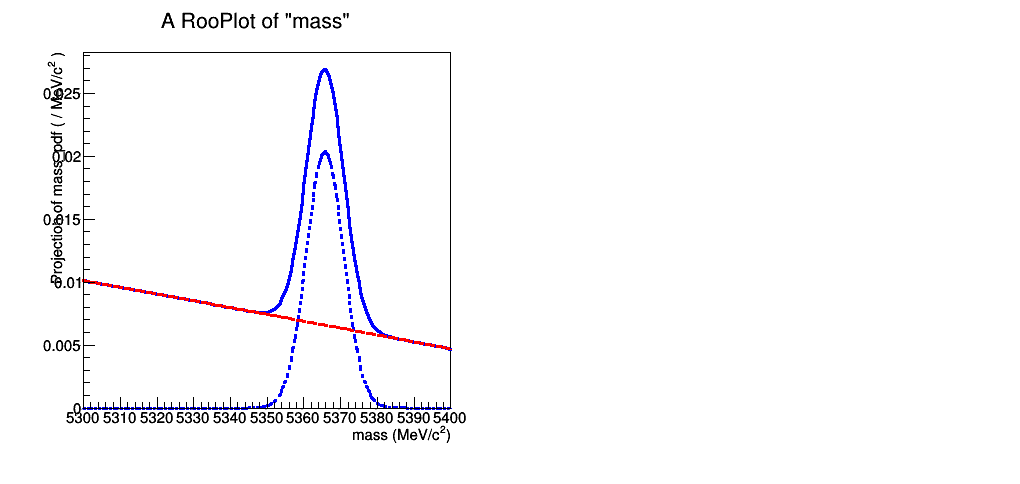

In [11]:
Image(filename='masspdfplot.png') 

This prints a lot of text output. Can you find the number of signal events from your fit in the output?

# Lifetime fit

Now we'll try to fit the lifetime of the signal distribution
RooFit comes with a few pre-built "B-decay specific" PDFs that
include CP violation, resolution modelling, mistag rates, etc.
These are a little too overkill for a basic tutorial, so we'll
concern ourselves with a simple exponential decay model here.

Part of the power of RooFit is the way in which PDFs can be
modified using formulae. The RooExponential PDF is of the form
$f = e^{c\cdot x}$ but we want $f = e^{-\frac{x}{c}}$. We can do this with
a RooFormulaVar

In [13]:
!root -b -q -l lifetime_fit.C

root [0] 
Processing lifetime_fit.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinuit::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal_time,bkg_time)
 **********
 **   13 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-28737.6 FROM MIGRAD    STATUS=INITIATE       57 CALLS          58 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1 

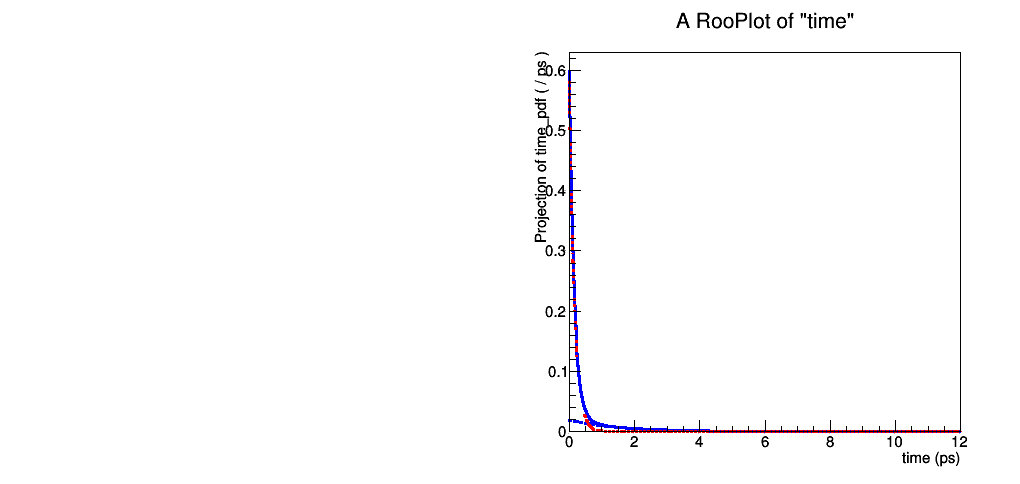

In [14]:
Image(filename='timepdfplot.png') 

In [19]:
!root -l -b -q combined_fits.C

root [0] 
Processing combined_fits.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinuit::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal_mass,bkg_mass)
 **********
 **   13 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
[#0] WARNING:Minization -- RooFitGlue: Minimized function has error status.
Returning maximum FCN so far (-10151.8) to force MIGRAD to back out of this region. Error log follows
Parameter values: Nbkg=2000, Nsig=2000, bkg_mass_p1=-1.03175, signal_mass_mean=5364.92, signal_mass_sigma=10
RooPolynomial::bkg

Lastly, we do a short toy study based on the result of our fit: What is
the _expected_ sensitivity of our model to the lifetime assuming the
result we measured? In my opinion this is the coolest feature of `RooFit`:
The models you build can be fit to data, can generate toy data or can
run big toy studies only with a couple of extra lines of code.

In [22]:
!root -l -b -q toystudies.C

root [0] 
Processing toystudies.C...

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinuit::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal_mass,signal_time,bkg_mass,bkg_time)
 **********
 **   13 **MIGRAD        3500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-10269.4 FROM MIGRAD    STATUS=INITIATE       82 CALLS          83 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE    

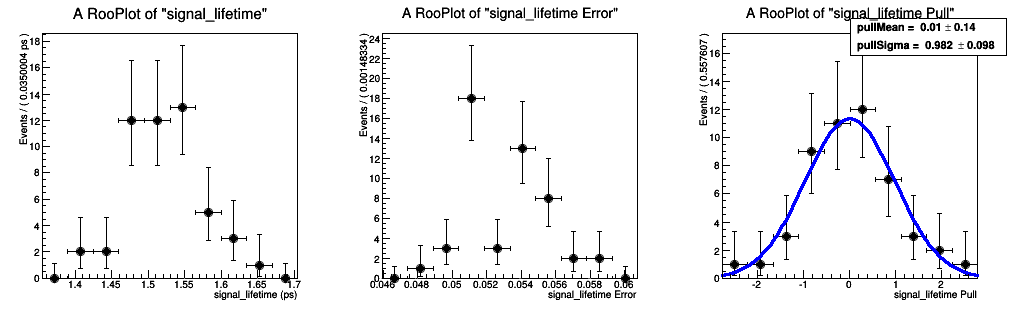

In [23]:
Image('toystudy1.png')

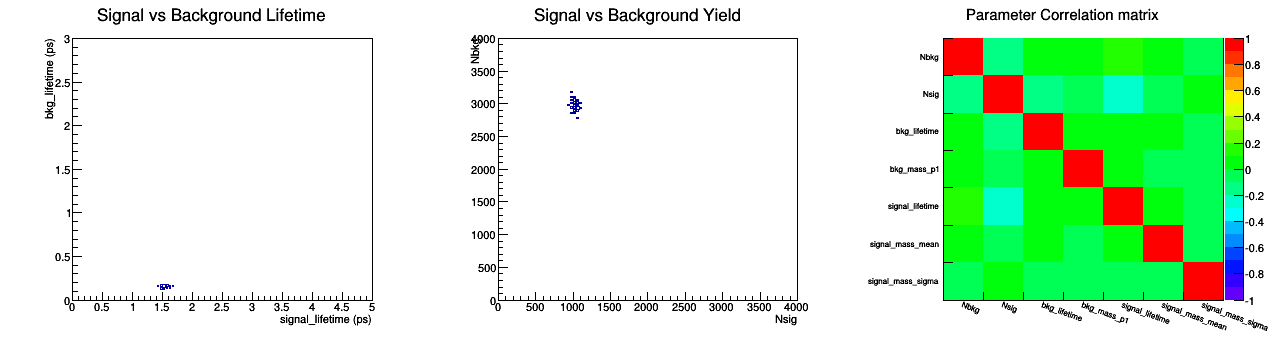

In [24]:
Image('toystudy2.png')